# Question 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
    return summary

In [3]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

In [4]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [5]:
def pca_scatter(pca, standardised_values, classifs, main):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)
    plt.title(main)
    plt.show()
    return bar

# DATAFRAME CREATED

In [8]:
data = pd.read_csv("Wholesale customers data.csv")
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
print(data)

     V1  V2     V3     V4     V5     V6     V7    V8
0     2   3  12669   9656   7561    214   2674  1338
1     2   3   7057   9810   9568   1762   3293  1776
2     2   3   6353   8808   7684   2405   3516  7844
3     1   3  13265   1196   4221   6404    507  1788
4     2   3  22615   5410   7198   3915   1777  5185
..   ..  ..    ...    ...    ...    ...    ...   ...
435   1   3  29703  12051  16027  13135    182  2204
436   1   3  39228   1431    764   4510     93  2346
437   2   3  14531  15488  30243    437  14841  1867
438   1   3  10290   1981   2232   1038    168  2125
439   1   3   2787   1698   2510     65    477    52

[440 rows x 8 columns]


# KEY VALUES IN DATASET

In [9]:
data.keys()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'], dtype='object')

# HEAD VALUES

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
X = data.loc[:,"V2":"V8"] # independent variables data
y = data.V1 # dependent variable data
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
pca = PCA().fit(standardisedX)
summary = pca_summary(pca, standardisedX,False)
print(summary)

                  sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.626551               0.377953              0.377953
PC2           1.305750               0.243569              0.621522
PC3           1.003140               0.143756              0.765277
PC4           0.859100               0.105436              0.870713
PC5           0.745963               0.079494              0.950208
PC6           0.534392               0.040796              0.991004
PC7           0.250940               0.008996              1.000000


## Deciding How Many Principal Components to Retain

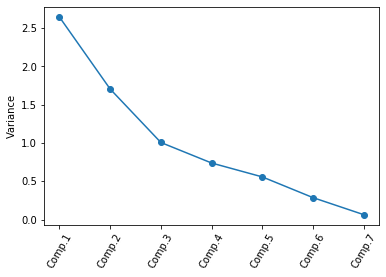

     Standard deviation
PC1            2.645669
PC2            1.704983
PC3            1.006290
PC4            0.738052
PC5            0.556460
PC6            0.285575
PC7            0.062971
     Cumulative Proportion
PC1               0.377953
PC2               0.621522
PC3               0.765277
PC4               0.870713
PC5               0.950208
PC6               0.991004
PC7               1.000000


In [12]:
screeplot(pca, standardisedX)
print(summary.sdev**2)
print(summary.cumprop)

## Loadings for the Principal Components

In [13]:
print(pca.components_[0])
print(pca.components_[1])
print(pca.components_[2])
print(pca.components_[3])
print(pca.components_[4])
print(pca.components_[5])
print(pca.components_[6])

[0.02056902 0.04368345 0.54517106 0.57894964 0.0512486  0.54820766
 0.2492317 ]
[ 0.0583253   0.52876695  0.08233427 -0.14730545  0.6076416  -0.25637237
  0.50355808]
[-9.86181604e-01 -6.88203033e-02  7.07125304e-04  1.05440202e-02
  1.49286109e-01  1.01145237e-02  1.44667411e-02]
[ 0.08474014 -0.80456955  0.06272752 -0.11167662  0.15424557 -0.14082867
  0.53428095]
[ 0.12765091 -0.25077064 -0.08369136  0.10159343  0.76219412  0.16670553
 -0.54292104]
[-0.01204903 -0.04739837  0.82681568 -0.315129   -0.02970002 -0.33993303
 -0.31343454]
[-3.05474708e-04 -3.60049216e-02 -3.80254527e-02  7.21739607e-01
 -1.56609801e-02 -6.85901855e-01 -7.51194783e-02]


### All principal components

In [14]:
print(pca.components_)

[[ 2.05690181e-02  4.36834460e-02  5.45171062e-01  5.78949643e-01
   5.12486019e-02  5.48207659e-01  2.49231700e-01]
 [ 5.83252985e-02  5.28766954e-01  8.23342670e-02 -1.47305448e-01
   6.07641595e-01 -2.56372374e-01  5.03558080e-01]
 [-9.86181604e-01 -6.88203033e-02  7.07125304e-04  1.05440202e-02
   1.49286109e-01  1.01145237e-02  1.44667411e-02]
 [ 8.47401397e-02 -8.04569548e-01  6.27275168e-02 -1.11676621e-01
   1.54245575e-01 -1.40828673e-01  5.34280947e-01]
 [ 1.27650909e-01 -2.50770641e-01 -8.36913574e-02  1.01593435e-01
   7.62194119e-01  1.66705525e-01 -5.42921039e-01]
 [-1.20490297e-02 -4.73983691e-02  8.26815676e-01 -3.15128999e-01
  -2.97000191e-02 -3.39933028e-01 -3.13434543e-01]
 [-3.05474708e-04 -3.60049216e-02 -3.80254527e-02  7.21739607e-01
  -1.56609801e-02 -6.85901855e-01 -7.51194783e-02]]


In [15]:
print(calcpc(standardisedX, pca.components_[0]))

[ 2.05469565e-01  4.46228421e-01  8.24132789e-01 -7.66022465e-01
  1.79955088e-01 -1.44020811e-01 -3.23364798e-01  1.52548329e-01
 -5.05588799e-01  1.60323945e+00  6.49301934e-01 -9.15402452e-01
  1.00483211e+00  8.62228035e-01  8.57779941e-01 -9.39522663e-01
  5.68629259e-01 -3.39835216e-01  3.29403028e-01 -3.12142388e-01
 -3.07252452e-01 -1.10650318e+00 -1.62568357e-01  4.70129831e+00
  1.25838778e+00 -1.42124530e-01 -1.02737156e+00 -1.08508677e+00
  3.13344016e+00 -7.65675854e-01  8.73710542e-02 -7.17419055e-01
 -9.49414722e-01 -3.36305947e-01 -1.05747616e+00  1.78214104e-01
 -1.58007772e-01  9.84424646e-01  1.59551208e+00 -7.63661602e-01
  2.68859021e-03 -2.19977449e-01  8.66897239e-01  1.95589596e+00
  2.92764191e-01  2.82514491e+00  1.87612615e+00  9.55021709e+00
  4.41860251e-01  3.60798505e+00 -9.16418784e-01 -4.97977039e-01
 -2.36744928e-01  7.11091754e-01 -9.54446471e-01 -5.02059183e-01
  4.60957530e+00  9.36335624e-01 -1.07717125e+00 -3.58556858e-02
 -2.15809512e-01  8.44108

In [16]:
print(calcpc(standardisedX, pca.components_[1]))

[-2.68755506e-01 -2.94123521e-01  8.47759702e-01  6.86295516e-01
  1.30551516e+00 -2.58696206e-01 -4.88017822e-01 -1.96221114e-01
 -6.22400366e-01 -7.08741440e-01 -3.70331303e-01 -1.81759381e-01
  7.21964235e-01 -5.22999099e-02  1.90479928e-01 -4.57793277e-01
 -9.91357153e-01  2.43319586e-01  4.76913874e-01 -6.67111097e-01
  1.93534406e-01 -1.94596527e-01  2.17504837e+00  3.62344813e+00
  1.08837021e+00 -4.85722144e-01 -2.36800688e-04 -2.04349951e-01
 -3.00896466e-01  1.11277136e+00  3.02537735e-01 -4.08840856e-01
  2.00856725e-02  1.21482309e+00 -7.63859880e-01 -1.03945672e+00
  1.30390511e+00 -3.34449833e-01 -1.09597601e+00  3.19440720e+00
  2.24687784e+00  4.49873227e-01 -9.44853834e-01 -1.53519736e+00
 -7.60042043e-01 -6.93199149e-02 -8.62338767e-01  1.52288575e+00
 -4.68037604e-01 -1.21135599e+00  1.69699213e-01 -8.33861935e-01
  9.01240801e-01 -1.12181243e+00  7.50823687e-01 -5.02301822e-01
 -1.21076656e+00 -9.10344750e-01 -1.98025701e-01 -5.82923557e-01
 -8.08114414e-01 -5.72589

### Scatter plot of PCA components

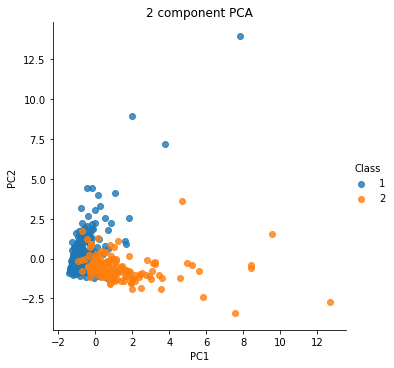

In [17]:
PCA = pca_scatter(pca, standardisedX, y,"2 component PCA")

In [18]:
print(data.shape)
print(PCA.shape)

(440, 8)
(440, 3)


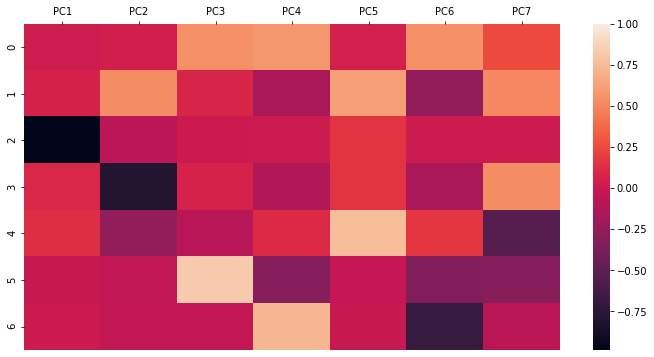

In [20]:
pca_df= pd.DataFrame(pca.components_,columns=["PC"+str(i) for i in range(1,len(pca.components_)+1)])
plt.figure(figsize=(12,6))
sns.heatmap(pca_df, vmax=1., square=False, annot = False).xaxis.tick_top()